In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
class AdalineGD(object):
    def __init__(self, eta= 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, x, y):
        self.w_ = np.zeros(1+x.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(x)
            errors = y - output
            self.w_[1:] += self.eta * x.T.dot(errors)
            self.w_[0] += self.eta* errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, x):
        return np.dot(x, self.w_[1:])+ self.w_[0]
    
    def activation(self, x):
        return self.net_input(x)
    
    def predict(self, x):
        return np.where(self.activation(x) >= 0.0, 1, -1)

In [44]:
from matplotlib.colors import ListedColormap

def plot_decision_region(x, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.04, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0], y = x[y==cl, 1], alpha = 0.8, cmap = cmap(idx), marker = markers[idx], label = cl)

In [45]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
x = df.iloc[0:100, [0,2]].values
# from sklearn import datasets
# iris = datasets.load_iris()
# x = iris.data[:100,[2,3]]
# y= iris.target[:100]
#df = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])

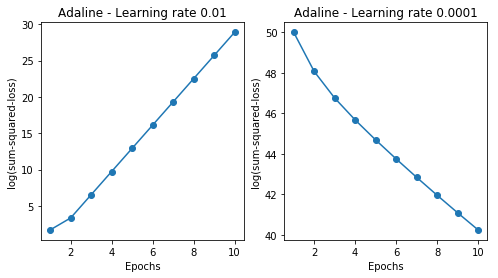

In [46]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
ada1 = AdalineGD(eta=0.01 ,n_iter=10).fit(x, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(sum-squared-loss)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(x,y)
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(sum-squared-loss)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

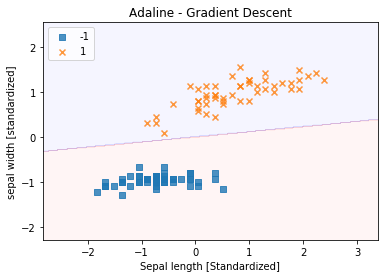

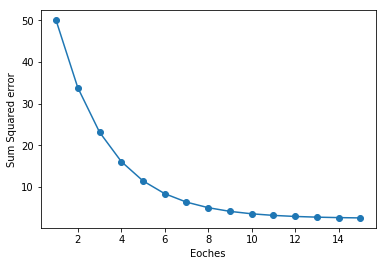

In [47]:
x_std = np.copy(x)
x_std[:,0] = (x[:,0] - x[:,0].mean())/x[:,0].std()
x_std[:,1] = (x[:,1] - x[:,1].mean())/x[:,1].std()

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(x_std, y)
plot_decision_region(x_std, y, classifier = ada)
plt.title(('Adaline - Gradient Descent'))
plt.xlabel('Sepal length [Standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker = 'o')
plt.xlabel('Eoches')
plt.ylabel('Sum Squared error')
plt.show()